In [49]:
import numpy as np
import matplotlib.pyplot as plt

Probemos una suma de trigonométricas con ruido

sen(w*x) tenemos w = frec angular

f = w/2pi

Por ejemplo
np.sin(30*pi*t)


T= 2/30 (vimos en geogebra)


f = 30/2 = 15


w = 2pif =30pi

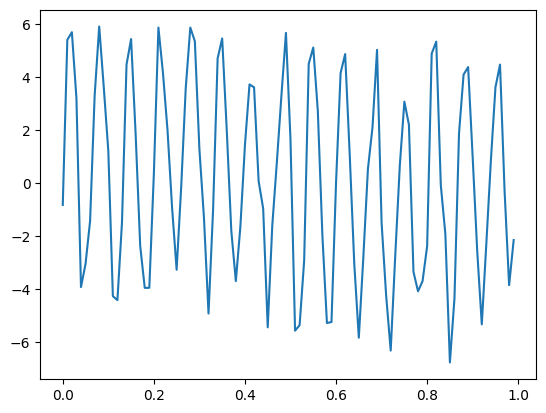

In [50]:
sr=100 #N
ts=1/sr #delta 1/100
#frecuencia de sampleo = 1/delta = 100
#Nyquist = 100/2 = 50
t=np.arange(0,1,ts)
x=np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t)+4*(np.random.rand(len(t))-0.5)
#x=np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t)
plt.plot(t, x)


Escribamos la transformada de Fourier discreta a mano

In [51]:
def DFT(x):
  N=len(x)
  X=[]
  for k in range(N):
    X_k=0
    for n in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      X_k+=x[n]/e
    X.append(X_k)
  return np.array(X)


Text(0.5, 1.0, 'Imaginary Part of DFT')

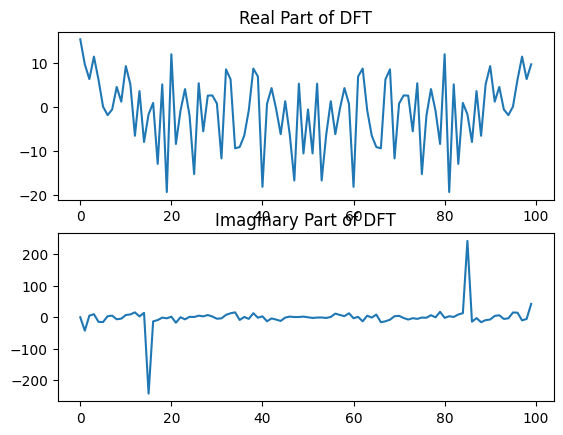

In [52]:
# Plot real part
plt.subplot(2, 1, 1)
plt.plot(np.real(DFT(x)))
plt.title('Real Part of DFT')

# Plot imaginary part
plt.subplot(2, 1, 2)
plt.plot(np.imag(DFT(x)))
plt.title('Imaginary Part of DFT')

Escribamos el algoritmo de la transformada inversa

In [53]:
def IDFT(X):
  N=len(X)
  x=[]
  for n in range(N):
    x_n=0
    for k in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      x_n+=X[k]*e
    x.append(x_n/100)
  return np.array(x)


Veamos si transformar y anti transformar devuelve la misma señal

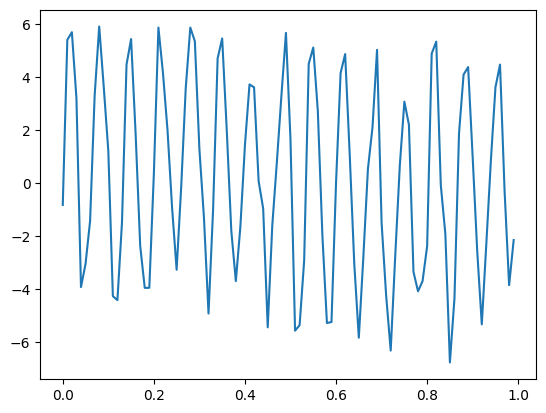

In [54]:
X=DFT(x)
V=IDFT(X)
plt.plot(t, V)


Da perfecto! Grafiquemos el power spectrum.

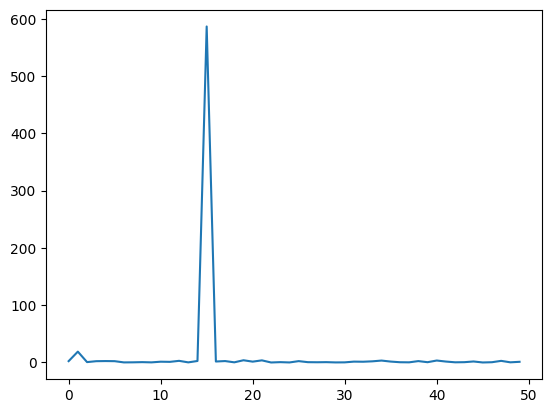

In [55]:
PS=DFT(x)*np.conj(DFT(x))/len(DFT(x))
PS_50 = PS[:50] #Nyquist
plt.plot(PS_50)
#plt.xlim(0,50)

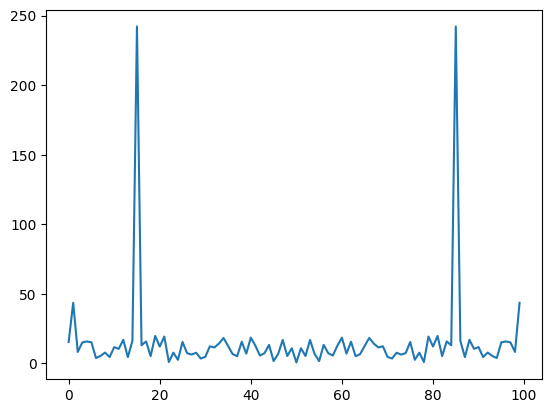

In [56]:
plt.plot(np.abs(DFT(x)))


Filtremos esas frecuencias bajas que molestan. Para ello repitamos el algoritmo de transformada inversa, pero con un if que filtre frecuencias.

In [57]:
def IcDFT(X):
  N=len(X)
  x=[]
  for n in range(N):
    x_n=0
    for k in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      if 2000>(X[k]*np.conj(X[k]))*N**(-1)>10:
        x_n+=X[k]*e
      else:
        x_n+=0
    x.append(x_n/100)
  return np.array(x)


Reconstruimos la señal filtrada y la comparamos con la sin ruido.

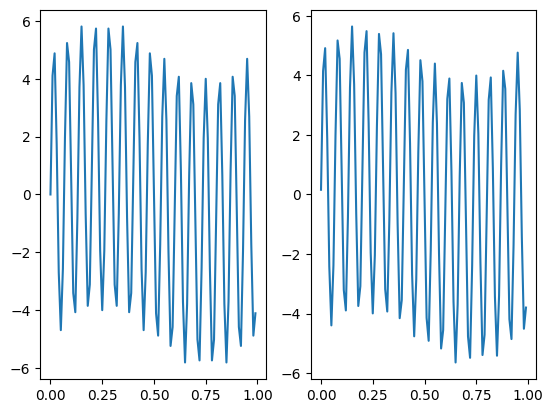

In [58]:
X=DFT(x)
V=IcDFT(X)
plt.subplot(1,2,1)
plt.plot(t, np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t))
plt.subplot(1,2,2)
plt.plot(t, V)

Más o menos la limpie! Veamos una señal con un ruido más fuerte.

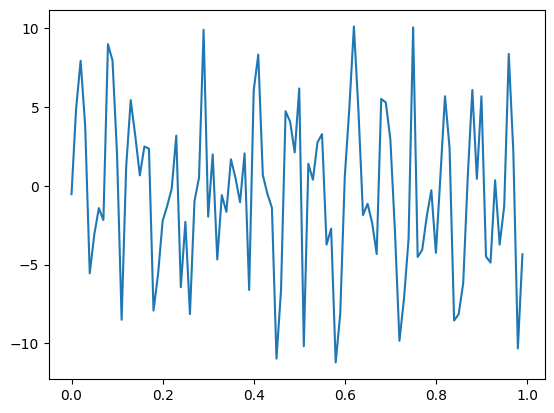

In [59]:
sr=100
ts=1/sr
t=np.arange(0,1,ts)
y=np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t)+13*(np.random.rand(len(t))-0.5)
plt.plot(t, y)

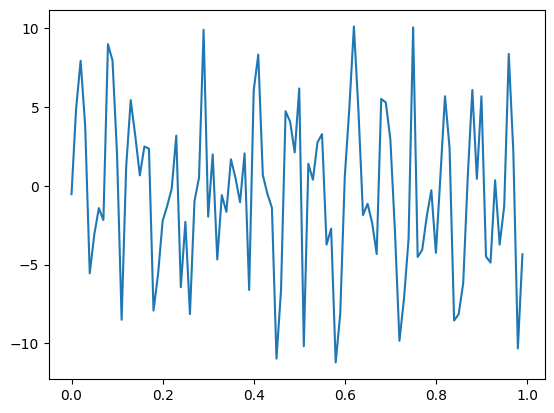

In [60]:
Y=DFT(y)
W=IDFT(Y)
plt.plot(t, W)

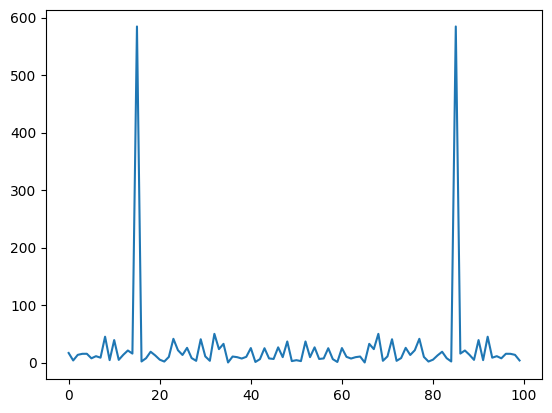

In [61]:
PS2=DFT(y)*np.conj(DFT(y))/len(DFT(y))
plt.plot(PS2)

Ahora determinar el ruido es subjetivo. Son las frecuencias mayores a 20 o 60? Probemos con 20.

In [62]:
def IcDFT2(X):
  N=len(X)
  x=[]
  for n in range(N):
    x_n=0
    for k in range(N):
      e=np.exp((2j*np.pi*k*n)/N)
      if 2000>(X[k]*np.conj(X[k]))*N**(-1)>20:
        x_n+=X[k]*e
      else:
        x_n+=0
    x.append(x_n/100)
  return np.array(x)

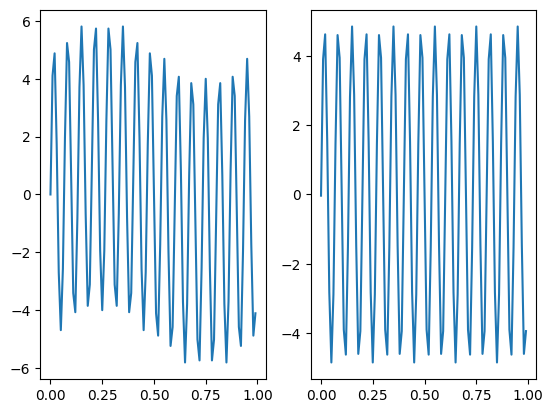

In [63]:
Y=DFT(y)
Wc=IcDFT2(X)
plt.subplot(1,2,1)
plt.plot(t, np.sin(2*np.pi*t)+5*np.sin(30*np.pi*t))
plt.subplot(1,2,2)
plt.plot(t, Wc)

Dió bien. En cambio con 60 pueden chequear que da peor.